In [1]:
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.myfunctions as mf

In [8]:
# Load WBT data
ds = xr.open_mfdataset('../data/processed/WBTdaily/WBTdailyens*.nc',combine='nested',concat_dim='ensemble')

# Load area data
land_area = xr.open_dataset('../data/processed/wbt.land_area')
land_mask = np.isfinite(land_area)
# Replace NaN with 0 
land_area_adj = land_area.where(land_mask,0).rename({'__xarray_dataarray_variable__':'land_area'})

In [10]:
def thres(ds,area_weights,thres,ax):
    # Set all values above threshold to true
    ds_bool = ds>=thres
    # Sum number of values above threshold per year
    freq = (ds_bool*area_weights).sum(['lon','lat','ensemble']).groupby('time.year').sum()
    # Total number of values (5 ensembles, 365 days per year)
    denom = 5*365
    
    # Frequency of occurrence as a percentage
    freq_frac = (freq/denom)*100
    
    # Plot frequency 
    (freq_frac)['land_area'].plot()
    
    # Return reduced dataset with only extreme temperatures
    return ds.where(ds_bool,drop=True)

In [11]:
def plot_thres3(region,ds,area):
    # Get data for region
    ds_region = mf.slice_region(ds,region)['WBT']
    area_region = mf.slice_region(area,region)
    # Weighted area of grid cells
    area_weights = area_region/(area_region.sum(['lon','lat']))
    
    fig,ax = plt.subplots(figsize=(10,7))
    ds_25 = thres(ds_region,area_weights,25,ax)
    ds_28 = thres(ds_25,area_weights,27.9,ax)
    thres(ds_28,area_weights,30,ax)

    ax.set_xlabel('Year')
    ax.set_ylabel('% of Days in Year')
    ax.set_title('Percent of Days With Maximum WBT Above Threshold Values: '+region)
    ax.legend(['25   $^\circ$C','27.9$^\circ$C','30   $^\circ$C'],loc='upper left')
    ax.xaxis.set_ticks(np.arange(1980, 2101, 20))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    fig.savefig(region+'thres.png')

/home/aos/kyan/miniconda3/envs/pei/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater_equal
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/kyan/miniconda3/envs/pei/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater_equal
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/kyan/miniconda3/envs/pei/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater_equal
  return func(*(_execute_task(a, cache) for a in args))


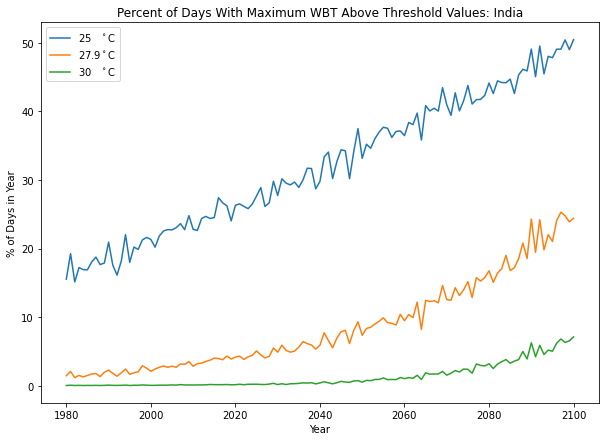

In [58]:
plot_thres3('India',ds,land_area_adj)

/home/aos/kyan/miniconda3/envs/pei/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater_equal
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/kyan/miniconda3/envs/pei/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater_equal
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/kyan/miniconda3/envs/pei/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater_equal
  return func(*(_execute_task(a, cache) for a in args))


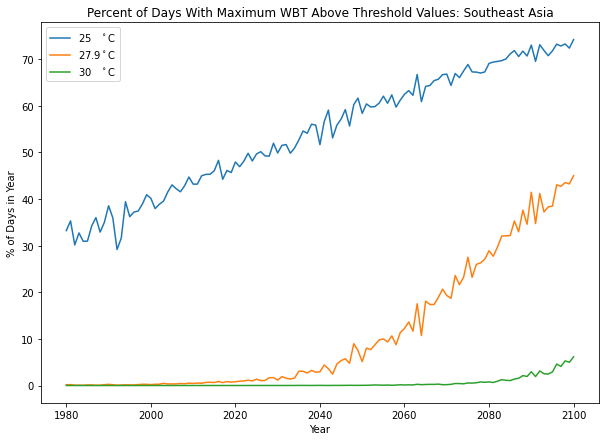

In [5]:
plot_thres3('Southeast Asia',ds,land_area_adj)